In [1]:
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%%time
import pickle
with open('page_dict.p', 'rb') as fp:
    page_dict = pickle.load(fp)

CPU times: user 6.3 s, sys: 2.96 s, total: 9.25 s
Wall time: 11.8 s


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
train_data = pd.read_csv('./anomaly-detection-competition-ml1-ts-spring-2020/train_groups.csv')

In [5]:
test_data = pd.read_csv('./anomaly-detection-competition-ml1-ts-spring-2020/test_groups.csv')

In [6]:
all_vectors_train = []
for group in tqdm_notebook(train_data.group_id.unique()):
    texts = []
    for i in train_data[train_data['group_id'] == group].doc_id:
        texts.append(page_dict.get(i))
    vectorizer = TfidfVectorizer(max_features=300)
    vectors = vectorizer.fit_transform(texts)
    print(vectors.shape)
    all_vectors_train.append(vectors)

(102, 300)
(94, 300)
(98, 300)
(88, 300)
(108, 300)
(71, 300)
(96, 300)
(91, 300)
(31, 300)
(97, 300)
(98, 300)
(65, 300)
(31, 300)
(92, 300)
(101, 300)
(94, 300)
(102, 300)
(89, 300)
(90, 300)
(95, 300)
(100, 300)
(87, 300)
(93, 300)
(102, 300)
(84, 300)
(79, 300)
(100, 300)
(91, 300)
(99, 300)
(104, 300)
(95, 300)
(105, 300)
(93, 300)
(98, 300)
(99, 300)
(103, 300)
(58, 300)
(104, 300)
(99, 300)
(98, 300)
(65, 300)
(103, 300)
(93, 300)
(88, 300)
(83, 300)
(97, 300)
(94, 300)
(55, 300)
(100, 300)
(88, 300)
(100, 300)
(99, 300)
(26, 300)
(100, 300)
(95, 300)
(92, 300)
(88, 300)
(98, 300)
(103, 300)
(81, 300)
(93, 300)
(105, 300)
(86, 300)
(96, 300)
(92, 300)
(91, 300)
(92, 300)
(104, 300)
(104, 300)
(102, 300)
(90, 300)
(83, 300)
(102, 300)
(102, 300)
(104, 300)
(49, 300)
(100, 300)
(96, 300)
(100, 300)
(58, 300)
(100, 300)
(95, 300)
(52, 300)
(103, 300)
(102, 300)
(101, 300)
(67, 300)
(43, 300)
(90, 300)
(100, 300)
(47, 300)
(102, 300)
(104, 300)
(103, 300)
(99, 300)
(97, 300)
(94, 30

In [7]:
d_train = dict(zip(train_data.group_id.unique(), all_vectors_train))

In [8]:
from sklearn.cluster import DBSCAN

In [76]:
clustering = DBSCAN(eps=0.2, min_samples=3, metric='cosine').fit_predict(d_train.get(5))

In [77]:
clustering

array([-1, -1,  0,  0, -1,  1,  0, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1,
       -1,  1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1,  0,
       -1, -1, -1, -1,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0, -1,  2,  0,
       -1,  1,  2, -1,  0,  0,  2, -1, -1,  0, -1,  0,  0, -1,  1,  0, -1,
       -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1,  0,
       -1, -1,  0, -1,  0,  1,  1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1,
       -1, -1,  0,  0,  0, -1])

In [78]:
import umap
import matplotlib.pyplot as plt

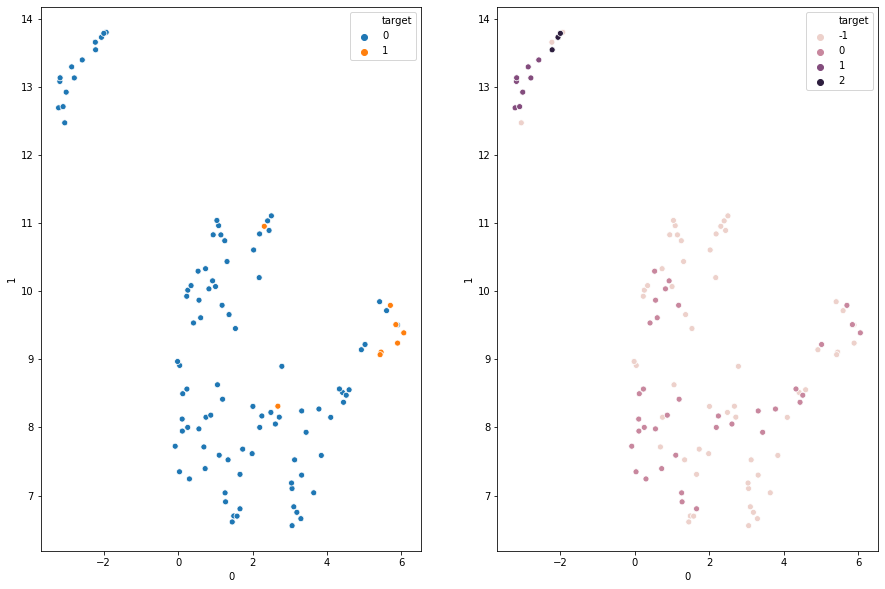

In [79]:
a = 5
plt.figure(figsize=(15,10))
mapper = umap.UMAP(metric='cosine', n_neighbors=7)
umap_res = mapper.fit_transform(d_train.get(a))
umap_res = pd.DataFrame(umap_res)
umap_res['target'] = list(train_data[train_data['group_id'] == a]['target'])
plt.subplot(1,2,1)
sns.scatterplot(data = pd.DataFrame(umap_res), x=0, y=1, hue='target')
umap_res['target'] = clustering
plt.subplot(1,2,2)
sns.scatterplot(data = pd.DataFrame(umap_res), x=0, y=1, hue='target')